In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff


# nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# important libraries
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from collections import Counter
import spacy
from spacy.util import compounding
from spacy.util import minibatch
from spacy import displacy
import gc
import os
from scipy.stats import skew, kurtosis

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import urllib
import csv
from scipy.special import softmax
from textblob import TextBlob
import time
import calendar

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIMS_Lab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0))

CUDA available: True
GPU Name: NVIDIA TITAN RTX


In [3]:
# Sets default size for all Seaborn plots to 20x10 inches.
sns.set(rc={'figure.figsize': (20,10)})

In [4]:
# Set the folder path
# Reads a 5% sampled dataset CSV file into a pandas DataFrame called df.
user_path = r"C:\Users\VIMS_Lab\Downloads\project_durgesh\project_twitter\sampled_dataset_1%.csv"
df = pd.read_csv(user_path, low_memory=False)

In [5]:
# user_path = r"E:\Data_Mining_project\Data mining data"

# csv_collection = []

# # Walk and collect paths
# for dirname, _, filenames in os.walk(user_path):
#     for filename in filenames:
#         if filename.endswith('.csv') or filename.endswith('.csv.gz'):
#             csv_collection.append(os.path.join(dirname, filename))

# print(f" Total CSV files found: {len(csv_collection)}")


In [6]:
# # Collect all DataFrames first
# dfs = []
# for i, data in enumerate(csv_collection):
#     try:
#         tmp = pd.read_csv(data, index_col=0, low_memory=False)
#         dfs.append(tmp)
#         print(f" Loaded {i+1}/{len(csv_collection)}: {data}")
#     except Exception as e:
#         print(f" Error loading {data}: {e}")

# # Final concatenation (much faster)
# df = pd.concat(dfs, axis=0, ignore_index=True)
# print(f" Final merged shape: {df.shape}")


In [7]:
# Print the number of rows and columns in the DataFrame
print(df.shape)

(708764, 28)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708764 entries, 0 to 708763
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   userid                   708764 non-null  int64  
 1   username                 708764 non-null  object 
 2   acctdesc                 566194 non-null  object 
 3   location                 413961 non-null  object 
 4   following                708764 non-null  int64  
 5   followers                708764 non-null  int64  
 6   totaltweets              708764 non-null  int64  
 7   usercreatedts            708764 non-null  object 
 8   tweetid                  708764 non-null  int64  
 9   tweetcreatedts           708764 non-null  object 
 10  retweetcount             708764 non-null  int64  
 11  text                     708764 non-null  object 
 12  hashtags                 708764 non-null  object 
 13  language                 708764 non-null  object 
 14  coor

In [9]:
# Print concise summary of the DataFrame including column types and non-null counts
df.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts'],
      dtype='object')

In [10]:
# Print the count of missing (NaN) values in each column, sorted in descending order
df.isna().sum().sort_values(ascending=False)

coordinates                707964
quoted_status_username     678566
in_reply_to_screen_name    654836
original_tweet_username    469977
location                   294803
is_retweet                 237897
is_quote_status            237897
original_tweet_userid      236847
original_tweet_id          236847
quoted_status_userid       236847
quoted_status_id           236847
in_reply_to_status_id      236847
in_reply_to_user_id        236847
acctdesc                   142570
text                            0
retweetcount                    0
usercreatedts                   0
totaltweets                     0
followers                       0
following                       0
userid                          0
username                        0
tweetcreatedts                  0
tweetid                         0
language                        0
hashtags                        0
favorite_count                  0
extractedts                     0
dtype: int64

In [11]:
# Remove rows where the 'location' column is missing (NaN)
df = df.dropna(subset=['location'])

In [12]:
# Print the count of each unique value in the 'language' column
print(df.language.value_counts())

language
en     263001
de      23830
und     23157
fr      20704
es      18485
        ...  
sd          4
km          3
hy          2
dv          1
ug          1
Name: count, Length: 64, dtype: int64


<Axes: xlabel='language', ylabel='count'>

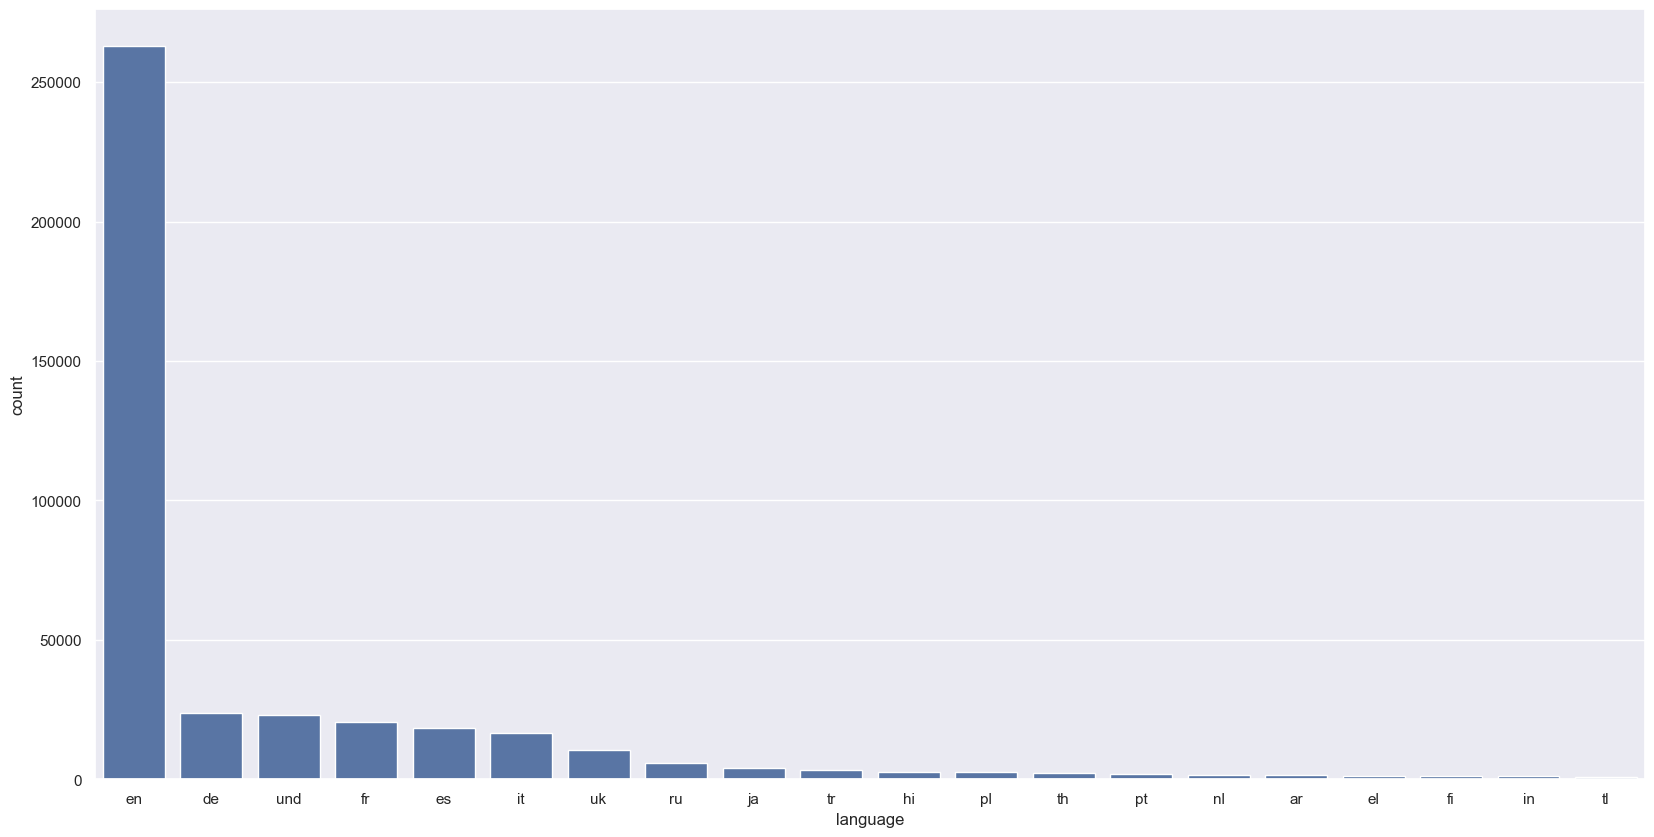

In [13]:
# Plotting the tweets based on language
sns.barplot(x= df.language.value_counts()[:20].index,y=df.language.value_counts()[:20])

In [14]:
# Unique Tweets based on language
df.groupby('language').nunique()

userid  username  acctdesc  location  following  followers  \
language                                                               
am            14        14        12        14         14         14   
ar           985       993       948       645        873       1138   
bg            68        69        64        52         82         86   
bn            79        79        84        36        135        347   
ca           433       434       412       344        429        445   
...          ...       ...       ...       ...        ...        ...   
uk          4833      4917      4722      2202       1942       3174   
und        15211     15272     14827      8600       5259       6101   
ur           443       445       395       213        406        464   
vi            59        59        55        43         91        145   
zh           437       440       394       297        464        483   

          totaltweets  usercreatedts  tweetid  tweetcreatedts  ...  \
language                                                       ...   
am                 14             14       14              14  ...   
ar               1330           1017     1377            1377  ...   
bg                 88             73       88              88  ...   
bn                364             94      369             369  ...   
ca                501            440      506             506  ...   
...               ...            ...      ...             ...  ...   
uk               8374           5257    10603           10599  ...   
und             17250          16060    23156           23133  ...   
ur                531            456      542             542  ...   
vi                165             65      171             171  ...   
zh                569            449      596             596  ...   

          original_tweet_userid  original_tweet_username  \
language                                                   
am                            4                        3   
ar                          146                      145   
bg                           12                       11   
bn                            6                        5   
ca                           70                       69   
...                         ...                      ...   
uk                          515                      516   
und                        1567                     1567   
ur                           86                       85   
vi                            5                        4   
zh                           90                       89   

          in_reply_to_status_id  in_reply_to_user_id  in_reply_to_screen_name  \
language                                                                        
am                            1                    1                        0   
ar                           53                   49                       48   
bg                           20                   21                       20   
bn                            2                    2                        1   
ca                           33                   36                       35   
...                         ...                  ...                      ...   
uk                         3710                 2649                     2680   
und                        3891                 2521                     2535   
ur                            5                    7                        6   
vi                           22                    8                        7   
zh                           57                   46                       45   

          is_quote_status  quoted_status_id  quoted_status_userid  \
language                                                            
am                      1                 1                     1   
ar                      2                39                    27   
bg                      2                 7        

In [15]:
# Dataset with only English as tweet language
df_en = df[df.language == 'en'].drop('language', axis=1)
print(df_en)

                     userid         username  \
4        838321345570156545       rogue_corq   
5        919372166868606977  wholesometumblr   
6       1343308799462023168     VivianAaron5   
7       1231988257031958531    MuhdSaniAdam6   
10               2184709993           PBFair   
...                     ...              ...   
708752            102359197       ashraf0129   
708753            272141810     juliewintrup   
708757           2283916915   SeanSeanbryson   
708758            603131175      Trishamac07   
708763           2432830728       SPBMcKenna   

                                                 acctdesc  \
4       @corq's snark account. \n\n#cyber #linux #agit...   
5                          beep beep bee boop boop, human   
6                                           Artist, Vegan   
7         Feature President, federal Republic of Nigeria.   
10      Join us from Sept 2 -11, 2022. The Permian Bas...   
...                                                   ...

In [16]:
# Sorting the Tweets based on Retweet count
sorted_tweets = df_en[['username', 'text','retweetcount','tweetid', ]].sort_values(by = 'retweetcount', ascending=False)

In [17]:
# Most Retweeted Tweet
most_retweeted = sorted_tweets.iloc[0]
print(most_retweeted.text)

#BTS #방탄소년단 #BTS_Proof Concept Photo (Door ver.) https://t.co/uMmykc7QvA


In [18]:
sorted_tweets.tweetid.iloc[0]

np.int64(1531887684444368896)

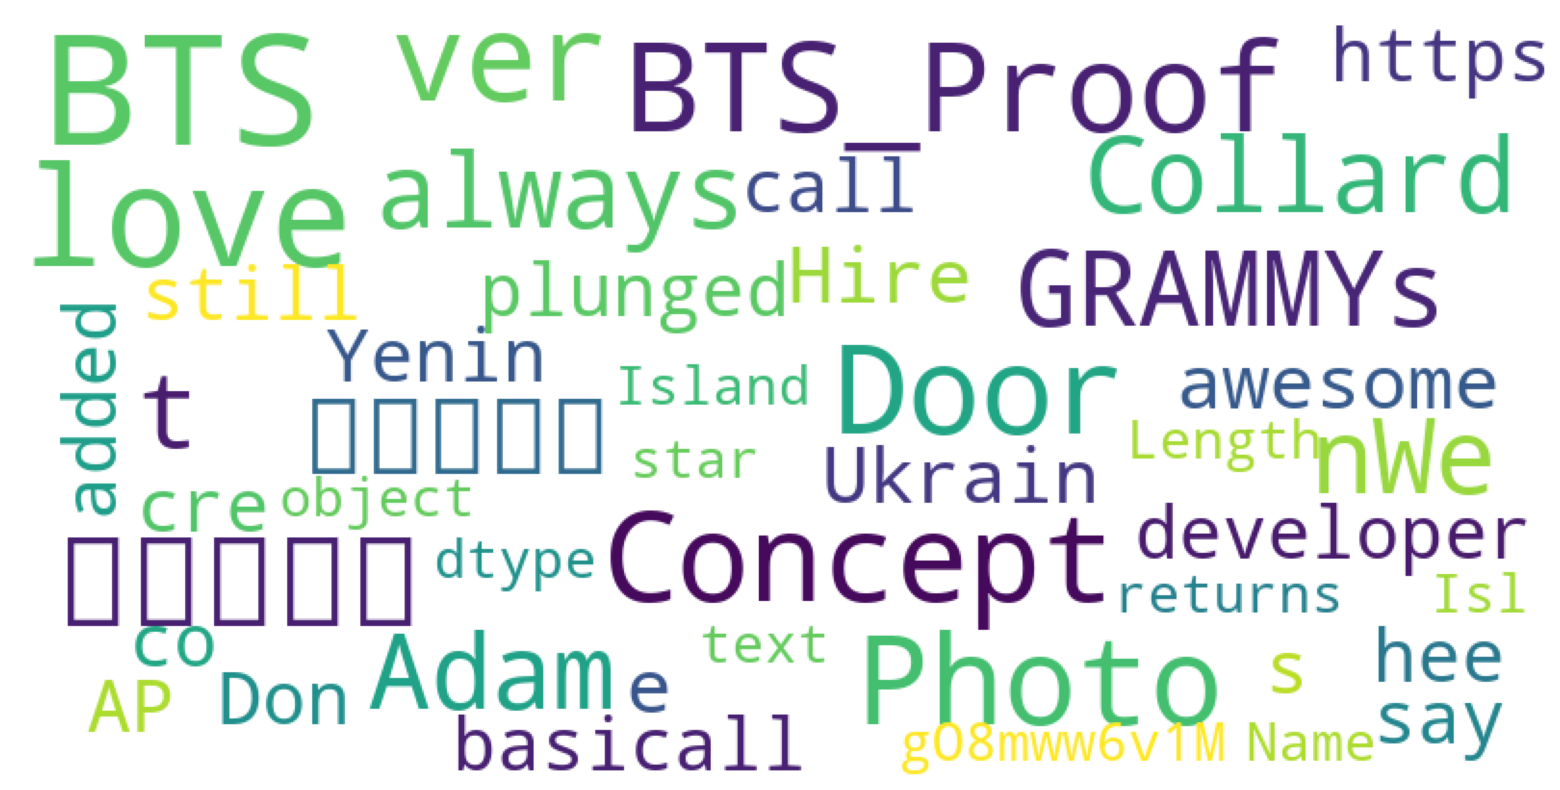

In [19]:
# WordCloud with STOPWORDS which is imported from wordcloud library
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(sorted_tweets['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
# WordCloud with stopwords which is imported from nltk library
unique_tweets = df_en.drop_duplicates(subset = ['text'])

<Axes: xlabel='location'>

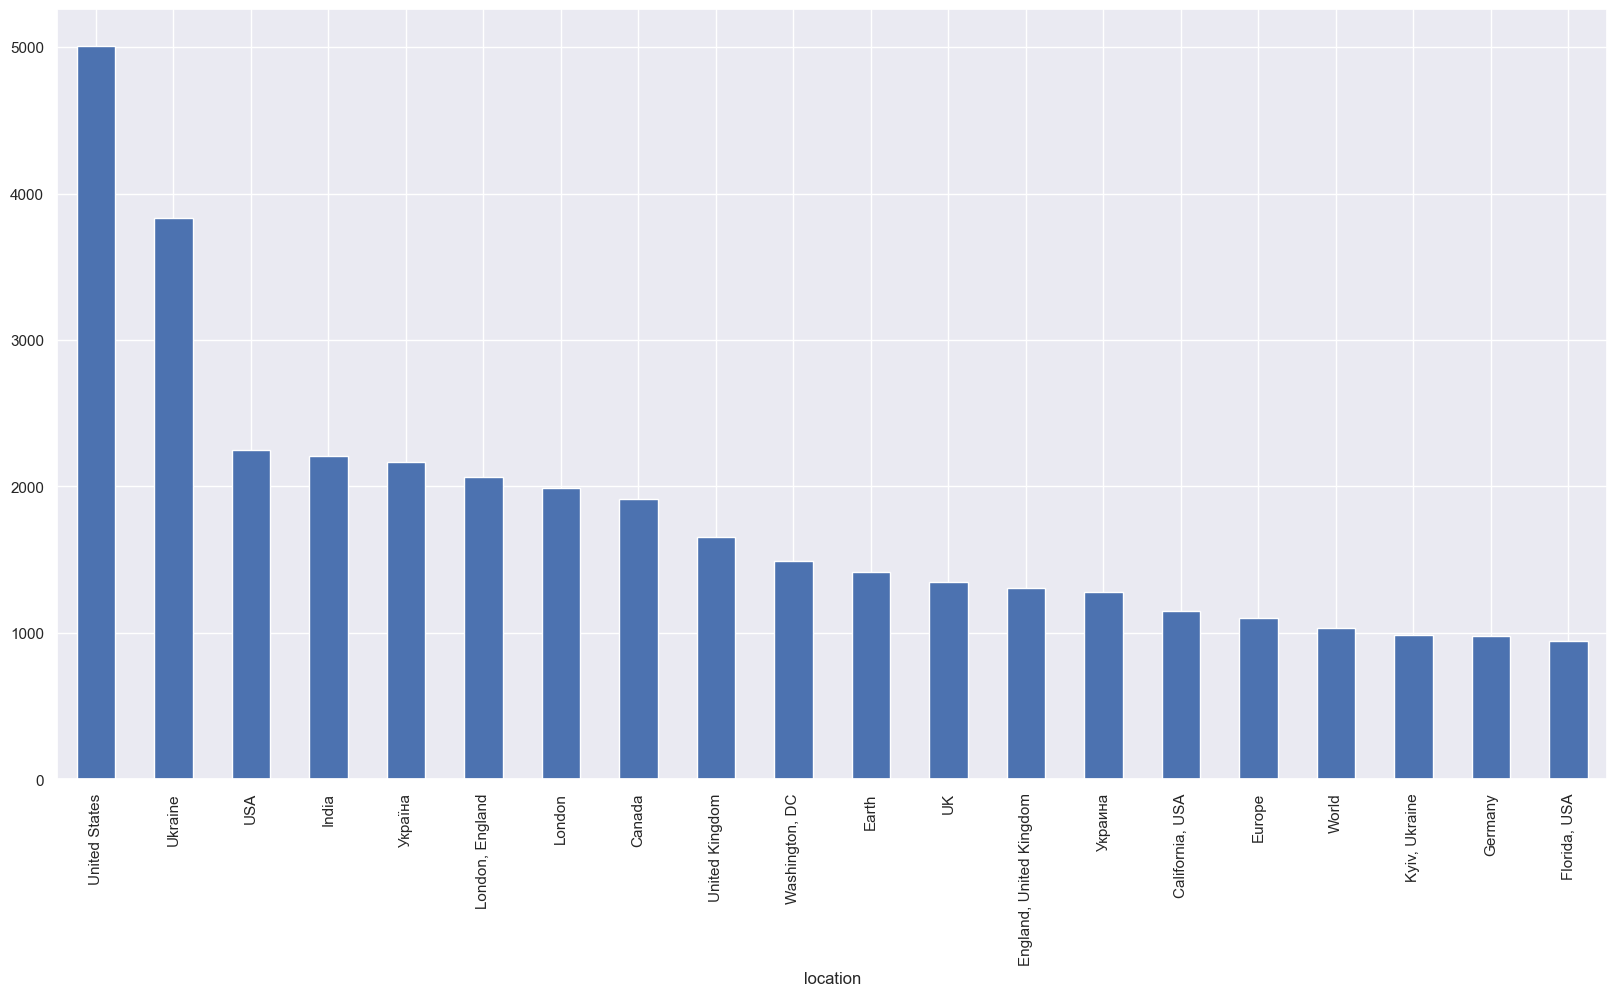

In [21]:
# Plotting the number of tweets based on the location of the tweet
df_en.location.value_counts()[:20].plot.bar()

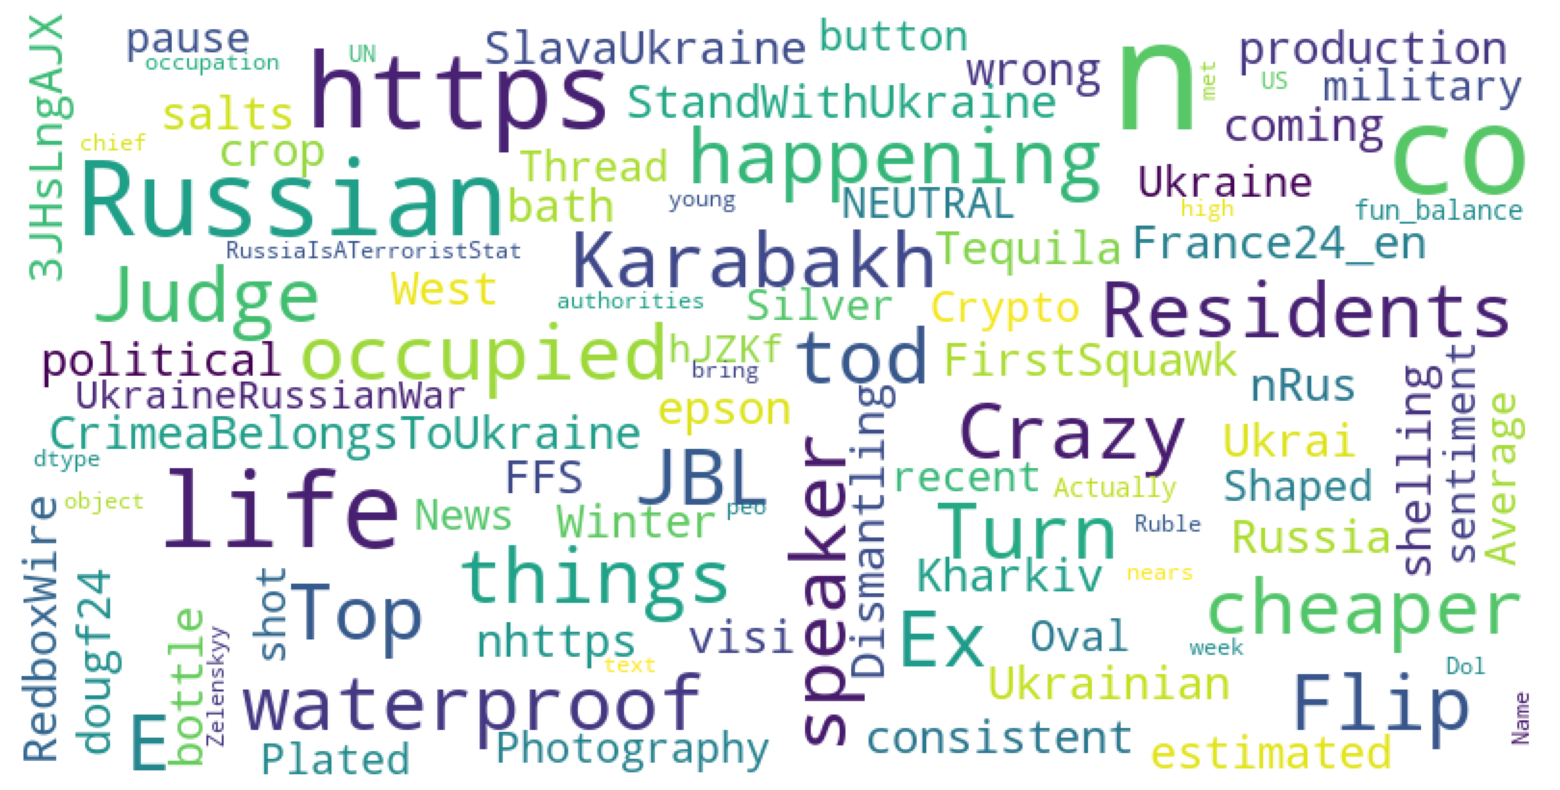

In [22]:
# Wordclouds using nltk stopwords based on unique tweets and ordered by number of retweets
stopwords_set = set(stopwords.words('english'))
wordcloud= WordCloud(background_color = 'white',
                    stopwords=stopwords_set,
                    max_words=300,
                    max_font_size=40,
                    scale = 2,
                    random_state=42
                    ).generate(str(unique_tweets.sort_values(by = 'retweetcount').iloc[:20]['text']))
print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
# Columns with time as a feature
# List of time columns
time_cols = ['extractedts', 'tweetcreatedts', 'usercreatedts']

# Convert each column to datetime with mixed formats and drop rows where conversion failed
for col in time_cols:
    df_en[col] = pd.to_datetime(df_en[col], format='mixed', errors='coerce')
    df_en = df_en.dropna(subset=[col])

In [24]:
df_en.head(10)

userid         username  \
4    838321345570156545       rogue_corq   
5    919372166868606977  wholesometumblr   
6   1343308799462023168     VivianAaron5   
7   1231988257031958531    MuhdSaniAdam6   
10           2184709993           PBFair   
13  1244505601746575360     VoskopoulosG   
16             53347655            UNAUK   
23            999907196    ottawafamtree   
25  1504914737653596161      LvivJournal   
35   930249938012798978  ZCNB0jB78GHKAG7   

                                             acctdesc              location  \
4   @corq's snark account. \n\n#cyber #linux #agit...      Хай живе Україна   
5                      beep beep bee boop boop, human            Boston, MA   
6                                       Artist, Vegan  USA, Weston, Florida   
7     Feature President, federal Republic of Nigeria.                Uganda   
10  Join us from Sept 2 -11, 2022. The Permian Bas...         Odessa, Texas   
13  f.DptHead/JMonnetCentreofExcellence RC/tor,Dir...                    EU   
16  We are the only charity in the #UK devoted to ...        United Kingdom   
23  #genealogy #familyhistory McEwan, Cadieux, O'C...        Ottawa, Canada   
25  Life in Lviv during war.\n🇪🇦 Volunteer. Keroua...         Lviv, Ukraine   
35  You were born to stand out, stop trying to fit...         Tigard, OR 🇺🇸   

    following  followers  totaltweets       usercreatedts  \
4        1874       1865       668672 2017-03-05 09:32:38   
5         383         65         5234 2017-10-15 01:19:40   
6        1157        283        88260 2020-12-27 21:33:30   
7         524         43          237 2020-02-24 17:04:37   
10        311        504         1492 2013-11-09 17:15:09   
13          5          2         4770 2020-03-30 06:05:39   
16       3820      12768        21445 2009-07-03 10:01:29   
23       5001       3100        67975 2012-12-09 18:50:46   
25        456        665         2509 2022-03-18 20:17:38   
35         54         90         8965 2017-11-14 01:44:03   

                tweetid      tweetcreatedts  ...  original_tweet_userid  \
4   1560511519976108037 2022-08-19 06:18:33  ...                    0.0   
5   1560686049466417152 2022-08-19 17:52:04  ...                    0.0   
6   1560693611443937280 2022-08-19 18:22:07  ...                    0.0   
7   1560484504082546689 2022-08-19 04:31:12  ...                    0.0   
10  1560718695038607368 2022-08-19 20:01:48  ...                    0.0   
13  1560713648435347456 2022-08-19 19:41:45  ...                    0.0   
16  1560601978585088002 2022-08-19 12:18:00  ...                    0.0   
23  1560493630766432256 2022-08-19 05:07:28  ...                    0.0   
25  1560745866633560064 2022-08-19 21:49:46  ...                    0.0   
35  1560643009393602562 2022-08-19 15:01:03  ...                    0.0   

   original_tweet_username in_reply_to_status_id in_reply_to_user_id  \
4                      NaN          0.000000e+00                 0.0   
5                      NaN          0.000000e+00                 0.0   
6                      NaN          0.000000e+00                 0.0   
7                      NaN          0.000000e+00                 0.0   
10                     NaN          0.000000e+00                 0.0   
13                     NaN          0.000000e+00                 0.0   
16                     NaN          0.000000e+00                 0.0   
23                     NaN          0.000000e+00                 0.0   
25                     NaN          1.560443e+18          53789862.0   
35                     NaN          0.000000e+00                 0.0   

    in_reply_to_screen_name is_quote_status  quoted_status_id  \
4                       NaN           False      0.000000e+00   
5                       NaN           False      0.000000e+00   
6                       NaN           False      0.000000e+00   
7                       NaN           False      0.000000e+00   
10                      NaN           False   

In [25]:
# Dataframe with sorted date of creation of user id
sort_by_userage= df_en.sort_values(by = time_cols[2], ascending=True)
columns = df_en.columns.to_list()

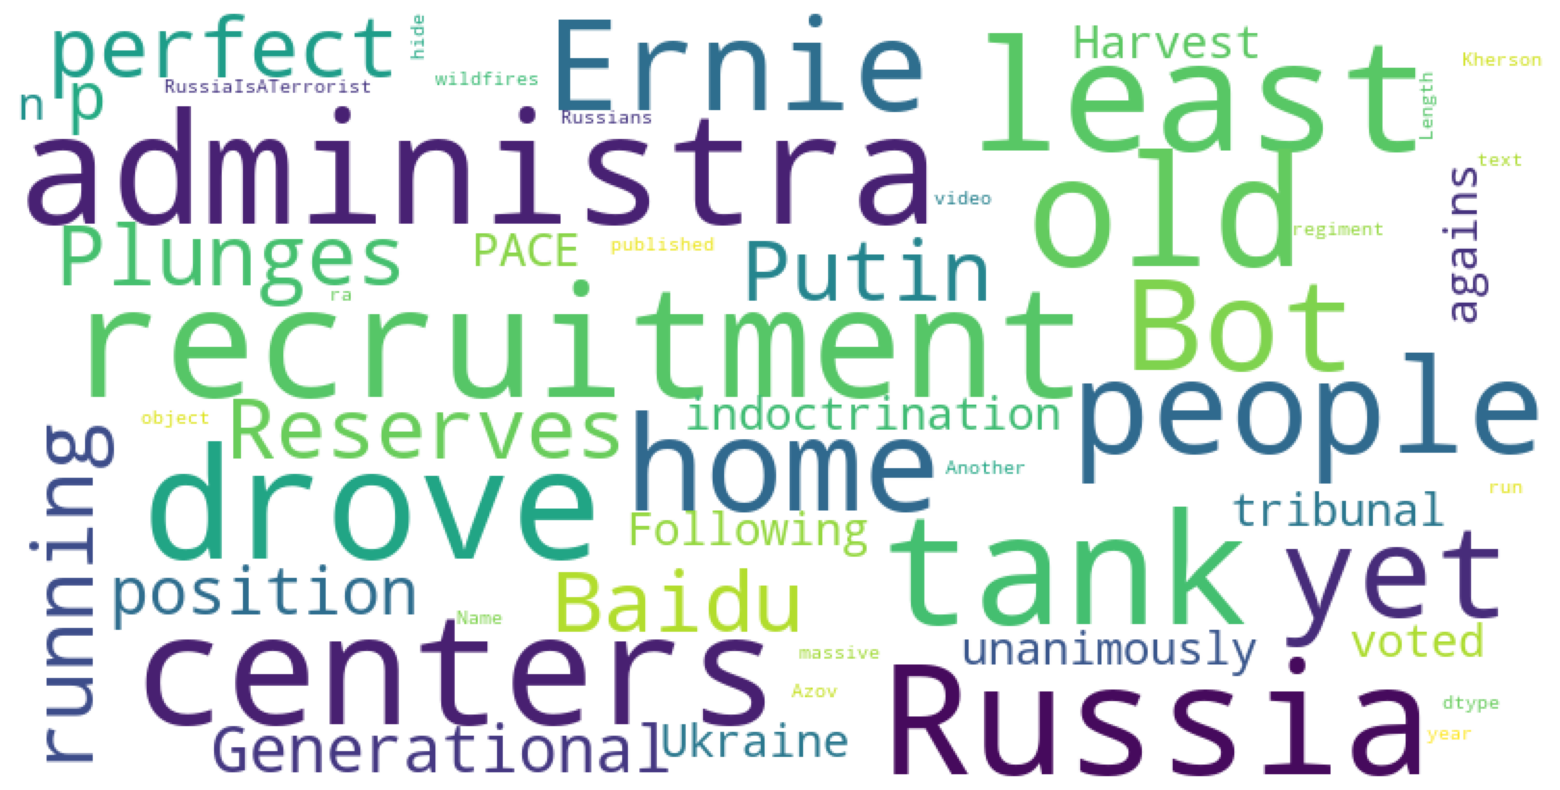

In [26]:
# Wordcloud using nltk based on unique tweets ordered by the date of creation of user id
stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                     max_words = 300,
                     max_font_size = 40,
                      scale = 2,
                     random_state = 42
                     ).generate(str(sort_by_userage.iloc[:1000,columns.index('text')]))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_La

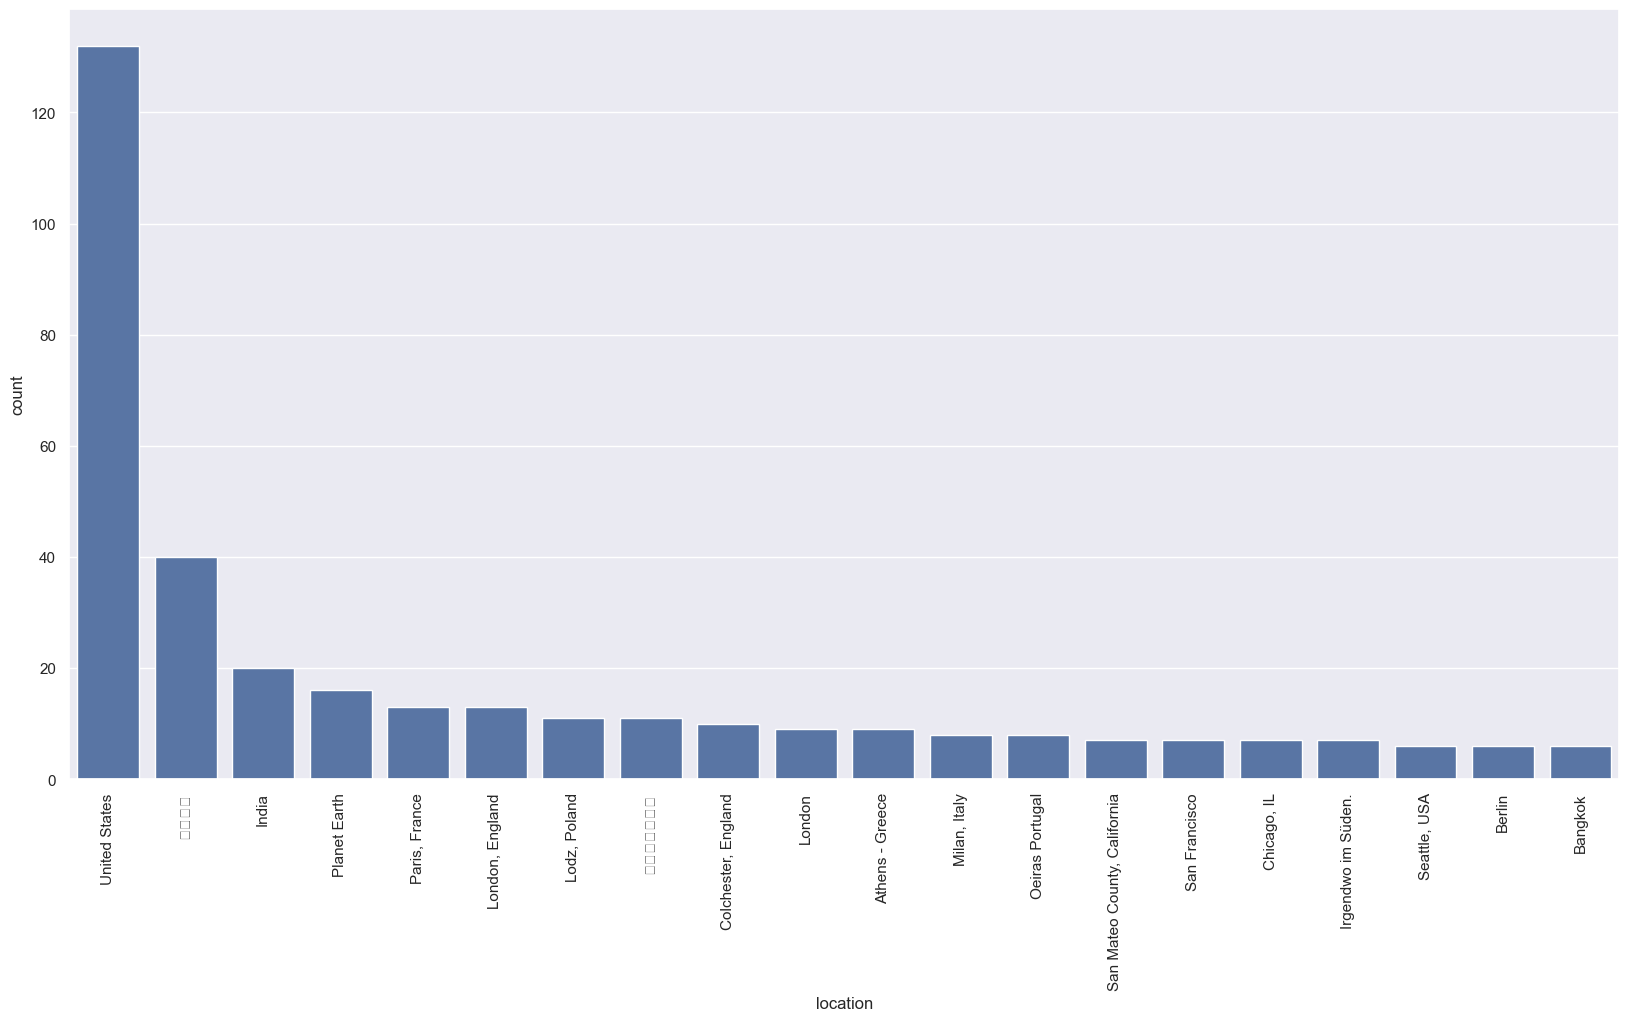

In [27]:
# Bar Plot on User Account Age and classified based on the location of the account Top 1000 sorted values
sns.barplot(x = sort_by_userage.iloc[:1000,columns.index('location')].value_counts()[:20].index,
           y = sort_by_userage.iloc[:1000, columns.index('location')].value_counts()[:20])
plt.xticks(rotation = 90)
plt.show()

c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2380 (\N{DEVANAGARI VOWEL SIGN AU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VIMS_Lab\Downloads\project_durgesh\deepfake\.deep\Lib\site-packages\IPytho

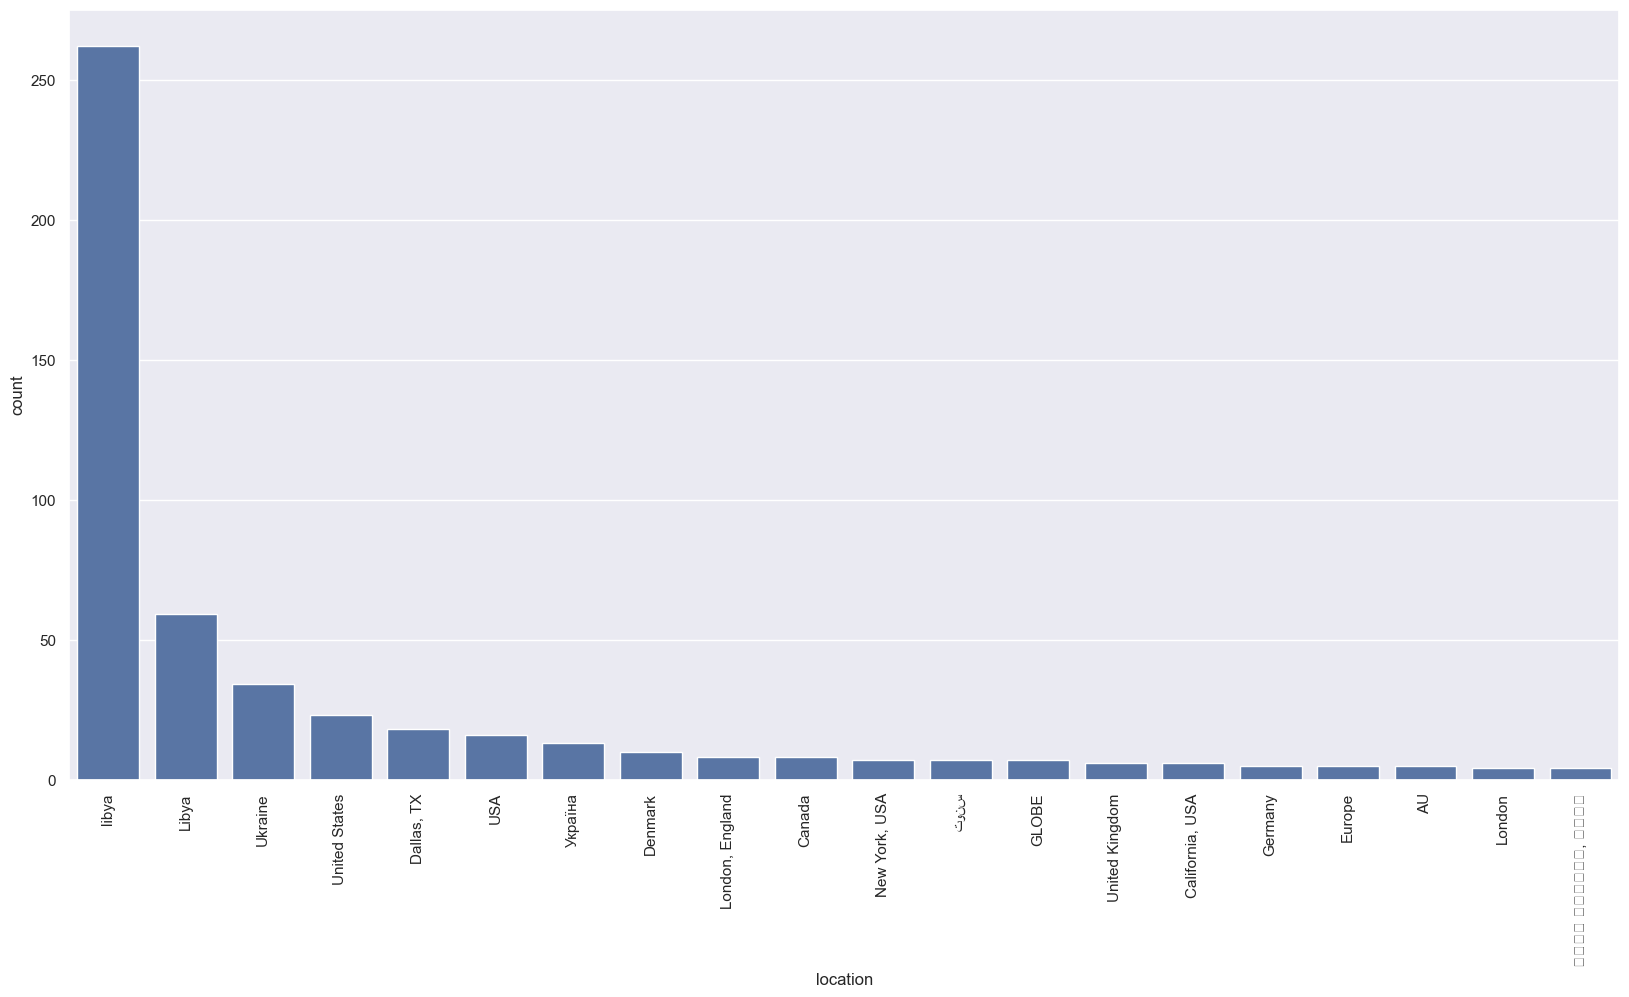

In [28]:
# Bottom 1000 sorted values¶
sns.barplot(x = sort_by_userage.iloc[df_en.shape[0]-1000:,
                                    columns.index('location')].value_counts()[:20].index,
           y= sort_by_userage.iloc[df_en.shape[0]-1000:,
                                  columns.index('location')].value_counts()[:20])
plt.xticks(rotation = 90)
plt.show()

In [29]:
numeric_cols = df.select_dtypes(include="number").columns

stats_df = pd.DataFrame({
    "mean":       df[numeric_cols].mean(),
    "std":        df[numeric_cols].std(),
    "variance":   df[numeric_cols].var(),
    "iqr":        df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
    "skewness":   df[numeric_cols].apply(skew),
    "kurtosis":   df[numeric_cols].apply(kurtosis),
    "cv":         df[numeric_cols].std() / df[numeric_cols].mean()
}).round(2)

display(stats_df)

mean           std      variance           iqr  \
userid                 5.587206e+17  6.353191e+17  4.036303e+35  1.235129e+18   
following              2.167830e+03  7.512260e+03  5.643406e+07  1.906000e+03   
followers              2.342484e+04  3.720039e+05  1.383869e+11  2.224000e+03   
totaltweets            7.721776e+04  2.269068e+05  5.148667e+10  6.430000e+04   
tweetid                1.550143e+18  4.878512e+16  2.379988e+33  6.813013e+16   
retweetcount           5.664700e+02  4.958540e+03  2.458715e+07  9.600000e+01   
favorite_count         2.500000e+00  4.438000e+01  1.969740e+03  0.000000e+00   
original_tweet_id      7.166711e+17  7.798268e+17  6.081299e+35  1.537867e+18   
original_tweet_userid  2.759707e+17  5.396797e+17  2.912541e+35  2.674405e+09   
in_reply_to_status_id  1.883294e+17  5.127281e+17  2.628901e+35  0.000000e+00   
in_reply_to_user_id    7.675517e+16  3.106452e+17  9.650042e+34  0.000000e+00   
quoted_status_id       1.687500e+17  4.869857e+17  2.371551e+35  0.000000e+00   
quoted_status_userid   4.118594e+16  2.300956e+17  5.294400e+34  0.000000e+00   

                       skewness  kurtosis     cv  
userid                     0.39     -1.63   1.14  
following                 25.88   1278.11   3.47  
followers                 37.59   2199.13  15.88  
totaltweets               60.77  12593.87   2.94  
tweetid                    0.93     -0.47   0.03  
retweetcount              34.11   1725.78   8.75  
favorite_count            69.23   7568.63  17.72  
original_tweet_id           NaN       NaN   1.09  
original_tweet_userid       NaN       NaN   1.96  
in_reply_to_status_id       NaN       NaN   2.72  
in_reply_to_user_id         NaN       NaN   4.05  
quoted_status_id            NaN       NaN   2.89  
quoted_status_userid        NaN       NaN   5.59

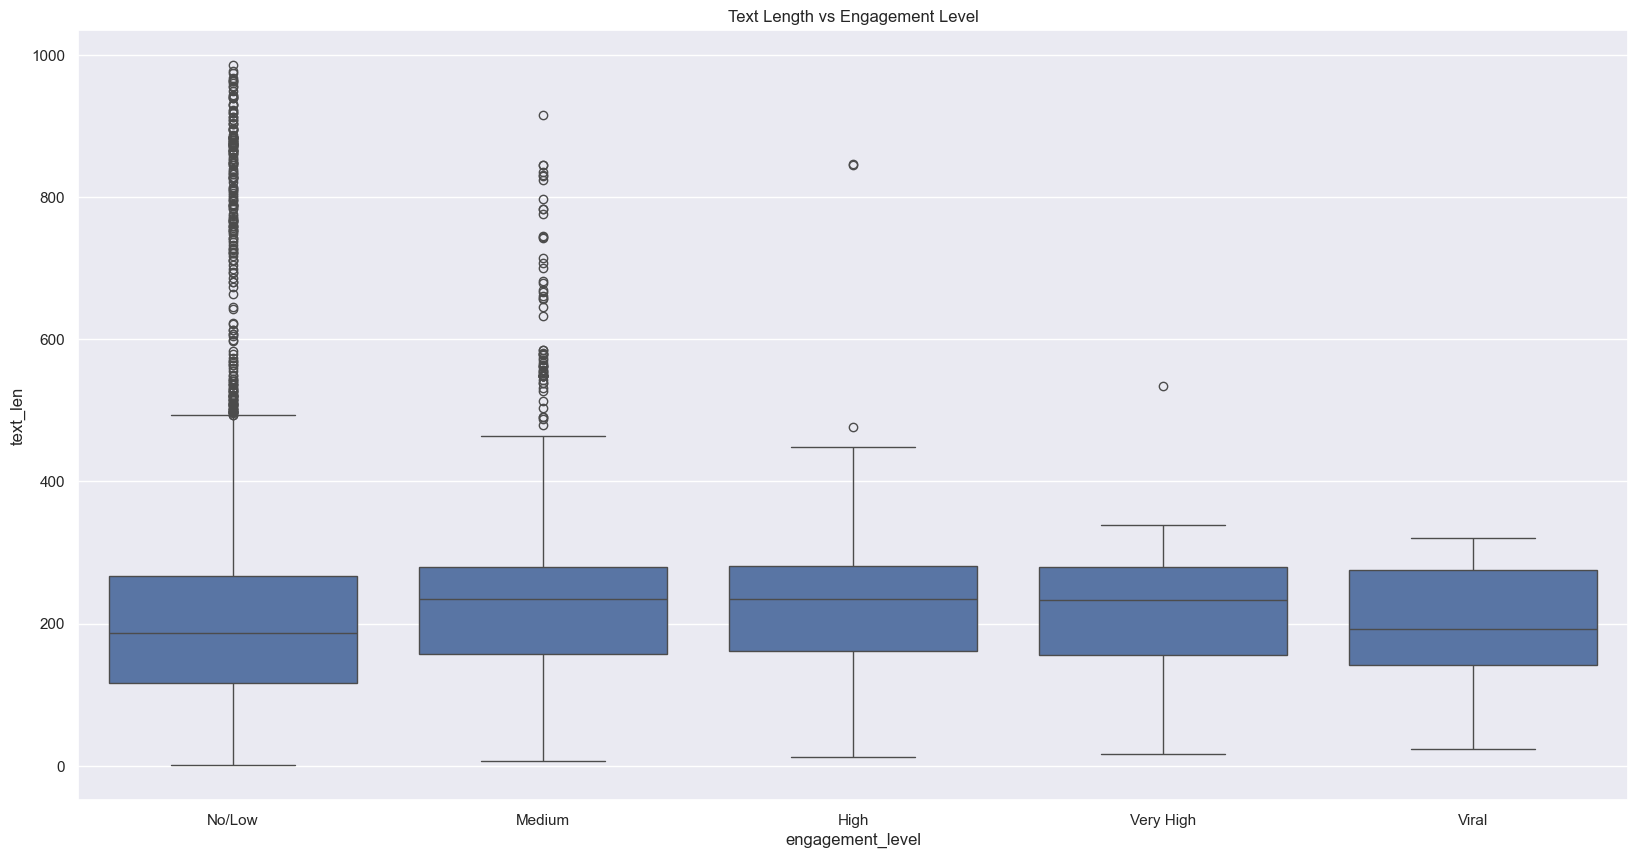

In [30]:
#  Engagement Score & Levels
df['engagement_score'] = (df['retweetcount'] + df['favorite_count']) / 2
df['engagement_level'] = pd.qcut(
    df['engagement_score'],
    q=[0, 0.5, 0.75, 0.9, 0.99, 1],
    labels=['No/Low', 'Medium', 'High', 'Very High', 'Viral']
)
df['text_len'] = df['text'].str.len()

sns.boxplot(
    data=df,
    x='engagement_level',
    y='text_len',
    order=['No/Low', 'Medium', 'High', 'Very High', 'Viral']
)
plt.title("Text Length vs Engagement Level")
plt.show()

In [31]:
# Cell 108  – Viral Tweet Identification
viral_threshold = df['engagement_score'].quantile(0.99)
viral_df = df[df['engagement_score'] >= viral_threshold]
nonviral_df = df[df['engagement_score'] < viral_threshold]

print(f"Total viral tweets: {len(viral_df)}")
print(f"Average followers (viral): {viral_df['followers'].mean():.0f}")
print(f"Average followers (non-viral): {nonviral_df['followers'].mean():.0f}")


Total viral tweets: 4140
Average followers (viral): 1723
Average followers (non-viral): 23644


In [32]:
df.tweetcreatedts.value_counts()

tweetcreatedts
2022-05-14 20:15:56.000000    7
2022-05-14 22:31:13.000000    6
2022-05-14 20:41:49.000000    5
2022-04-04 02:20:05.000000    5
2022-04-04 03:08:15.000000    5
                             ..
2022-03-31 23:15:07.000000    1
2022-03-31 14:20:01.000000    1
2022-03-31 06:51:48.000000    1
2022-03-31 19:32:47.000000    1
2022-03-31 13:12:52.000000    1
Name: count, Length: 407883, dtype: int64

In [33]:

print(df['tweetcreatedts'].unique())
print(df['tweetcreatedts'].nunique())

['2022-08-19 05:52:03' '2022-08-19 18:33:25' '2022-08-19 16:19:31' ...
 '2022-03-31 06:51:48.000000' '2022-03-31 19:32:47.000000'
 '2022-03-31 00:53:32.000000']
407883


In [34]:
print(df['tweetcreatedts'].value_counts())


tweetcreatedts
2022-05-14 20:15:56.000000    7
2022-05-14 22:31:13.000000    6
2022-05-14 20:41:49.000000    5
2022-04-04 02:20:05.000000    5
2022-04-04 03:08:15.000000    5
                             ..
2022-03-31 23:15:07.000000    1
2022-03-31 14:20:01.000000    1
2022-03-31 06:51:48.000000    1
2022-03-31 19:32:47.000000    1
2022-03-31 13:12:52.000000    1
Name: count, Length: 407883, dtype: int64


In [35]:
# Create a temporary copy of just the tweetcreatedts column
raw_times = df['tweetcreatedts'] 
tweet_times = pd.to_datetime(raw_times, format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

tweet_times = tweet_times.dropna()

In [36]:
tweet_times.info()

<class 'pandas.core.series.Series'>
Index: 216270 entries, 207576 to 708763
Series name: tweetcreatedts
Non-Null Count   Dtype         
--------------   -----         
216270 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


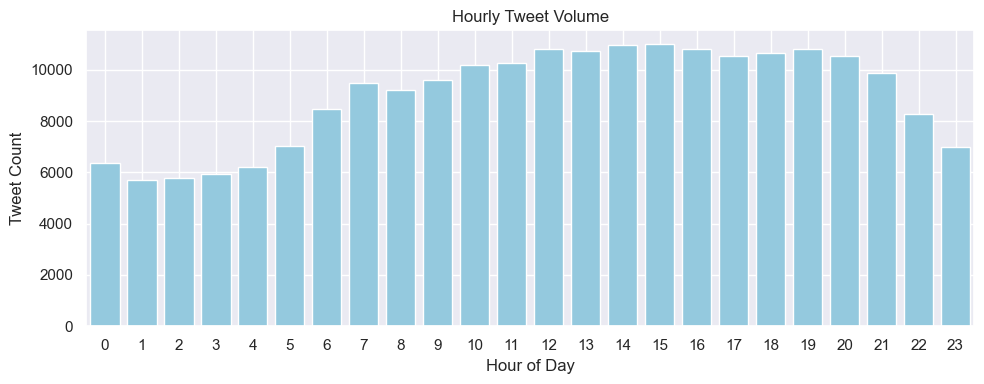

In [37]:
tweet_hours = tweet_times.dt.hour.value_counts().sort_index()
plt.figure(figsize=(10, 4))
sns.barplot(x=tweet_hours.index, y=tweet_hours.values, color='skyblue')
plt.title("Hourly Tweet Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Tweet Count")
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

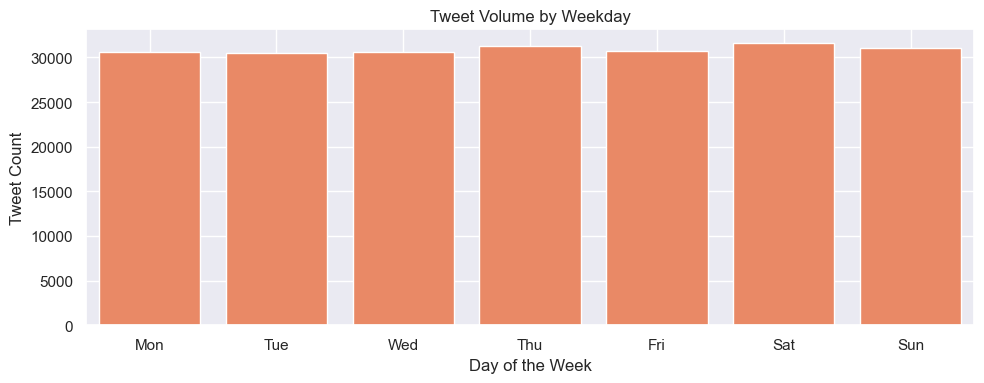

In [38]:
weekday_counts = tweet_times.dt.dayofweek.value_counts().sort_index()

# Mapping index to weekday names
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 4))
sns.barplot(x=weekday_labels, y=weekday_counts.values, color='coral')
plt.title("Tweet Volume by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.tight_layout()
plt.show()

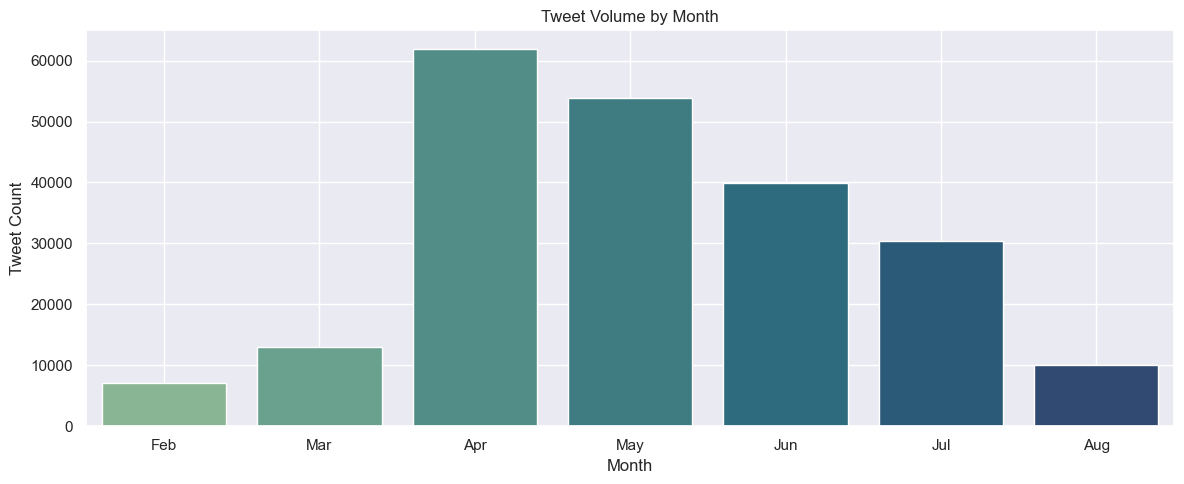

In [39]:
month_counts = tweet_times.dt.month.value_counts().sort_index()
month_index = month_counts.index
month_labels = [calendar.month_abbr[m] for m in month_index]

# Create a DataFrame for clarity
month_df = pd.DataFrame({
    'Month': month_labels,
    'Count': month_counts.values
})

# Now pass hue='Month' to use palette safely
plt.figure(figsize=(12, 5))
sns.barplot(data=month_df, x='Month', y='Count', hue='Month', palette='crest', legend=False)
plt.title("Tweet Volume by Month")
plt.xlabel("Month")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
tweet_times.dt.year.value_counts().sort_index()

tweetcreatedts
2022    216270
Name: count, dtype: int64

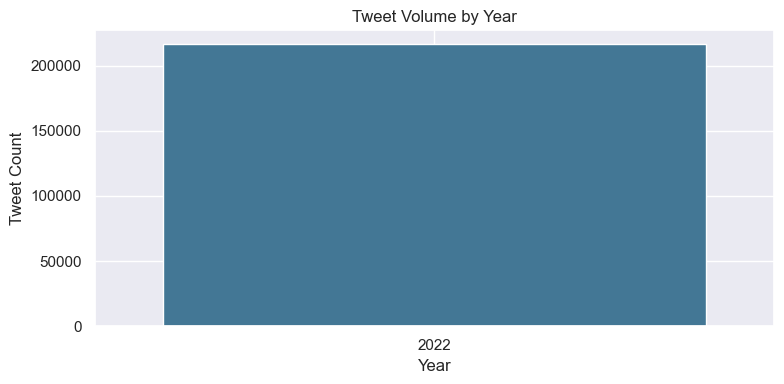

In [41]:
year_counts = tweet_times.dt.year.value_counts().sort_index()

# Step 2: Create a DataFrame for seaborn
year_df = pd.DataFrame({
    'Year': year_counts.index.astype(str),
    'Count': year_counts.values
})

# Step 3: Use hue to safely apply palette
plt.figure(figsize=(8, 4))
sns.barplot(data=year_df, x='Year', y='Count', hue='Year', palette='mako', legend=False)
plt.title("Tweet Volume by Year")
plt.xlabel("Year")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Hastag Analysis
num_chars = df_en.text.apply(len)
num_words = df_en.text.apply(lambda x: len(x.split()))
df_en['num_chars'] = num_chars
df_en['num_words'] = num_words


In [43]:
print(f"average num characters: {num_chars.mean()}")
print(f"average num words : {num_words.mean()}")
print(f"median num characters: {num_chars.median()}")
print(f"median num words: {num_words.median()}")

average num characters: 210.670563990251
average num words : 29.135124961502047
median num characters: 221.0
median num words: 30.0


In [44]:
df_en.groupby('num_chars')[['retweetcount', 'favorite_count']].describe()


retweetcount                                      favorite_count  \
                 count  mean  std  min  25%  50%   75%  max          count   
num_chars                                                                    
5                  1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0            1.0   
8                  4.0  0.00  0.0  0.0  0.0  0.0  0.00  0.0            4.0   
9                  4.0  0.00  0.0  0.0  0.0  0.0  0.00  0.0            4.0   
10                 4.0  0.25  0.5  0.0  0.0  0.0  0.25  1.0            4.0   
11                 5.0  0.00  0.0  0.0  0.0  0.0  0.00  0.0            5.0   
...                ...   ...  ...  ...  ...  ...   ...  ...            ...   
956                1.0  1.00  NaN  1.0  1.0  1.0  1.00  1.0            1.0   
964                1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0            1.0   
967                1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0            1.0   
974                1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0            1.0   
978                1.0  0.00  NaN  0.0  0.0  0.0  0.00  0.0            1.0   

                                                       
           mean        std  min  25%  50%   75%   max  
num_chars                                              
5           1.0        NaN  1.0  1.0  1.0   1.0   1.0  
8           0.0   0.000000  0.0  0.0  0.0   0.0   0.0  
9           0.5   0.577350  0.0  0.0  0.5   1.0   1.0  
10         18.0  36.000000  0.0  0.0  0.0  18.0  72.0  
11          0.2   0.447214  0.0  0.0  0.0   0.0   1.0  
...         ...        ...  ...  ...  ...   ...   ...  
956         0.0        NaN  0.0  0.0  0.0   0.0   0.0  
964         1.0        NaN  1.0  1.0  1.0   1.0   1.0  
967         3.0        NaN  3.0  3.0  3.0   3.0   3.0  
974         1.0        NaN  1.0  1.0  1.0   1.0   1.0  
978         0.0        NaN  0.0  0.0  0.0   0.0   0.0  

[644 rows x 16 columns]

In [45]:
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'], errors='coerce')
df['extractedts'] = pd.to_datetime(df['extractedts'], errors='coerce') 
gc.collect()

20548

In [46]:
from unidecode import unidecode
def evaluate_hashtags(x):
    hashtags = []
    
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags

In [47]:
masterlist = []
hashtagsListCollection = df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        masterlist.append(hashtag)

In [48]:
topXItem = 25
from collections import Counter

x = Counter(masterlist)

topXItemList = x.most_common(topXItem)

In [49]:
df_hash = pd.DataFrame(topXItemList)
df_hash.columns =['Hashtag','Tweets']
df_hash

Hashtag  Tweets
0                   ukraine  129104
1                    russia   55363
2                     putin   28482
3          standwithukraine   21978
4                      nato   14916
5                   russian   14268
6          ukrainerussiawar   13714
7                      news   12637
8                  mariupol   11386
9                       usa   11372
10               ukrainewar   11058
11             slavaukraini    8576
12  russiaisaterroriststate    8432
13                    biden    8089
14                ukrainian    8017
15                 zelensky    7969
16                     kyiv    7495
17                    china    7058
18        ukrainerussianwar    6646
19                  ucrania    6589
20         russiaukrainewar    6259
21                    rusia    6195
22               stoprussia    6181
23                  bakhmut    6060
24                   canada    5659

In [50]:
dfpivot = df_hash.T
new_header = dfpivot.iloc[0] #grab the first row for the header
dfpivot = dfpivot[1:] #take the data less the header row
dfpivot.columns = new_header #set the header row as the df header
dfpivot

Hashtag ukraine russia  putin standwithukraine   nato russian  \
Tweets   129104  55363  28482            21978  14916   14268   

Hashtag ukrainerussiawar   news mariupol    usa  ... zelensky  kyiv china  \
Tweets             13714  12637    11386  11372  ...     7969  7495  7058   

Hashtag ukrainerussianwar ucrania russiaukrainewar rusia stoprussia bakhmut  \
Tweets               6646    6589             6259  6195       6181    6060   

Hashtag canada  
Tweets    5659  

[1 rows x 25 columns]

<Axes: xlabel='Hashtag'>

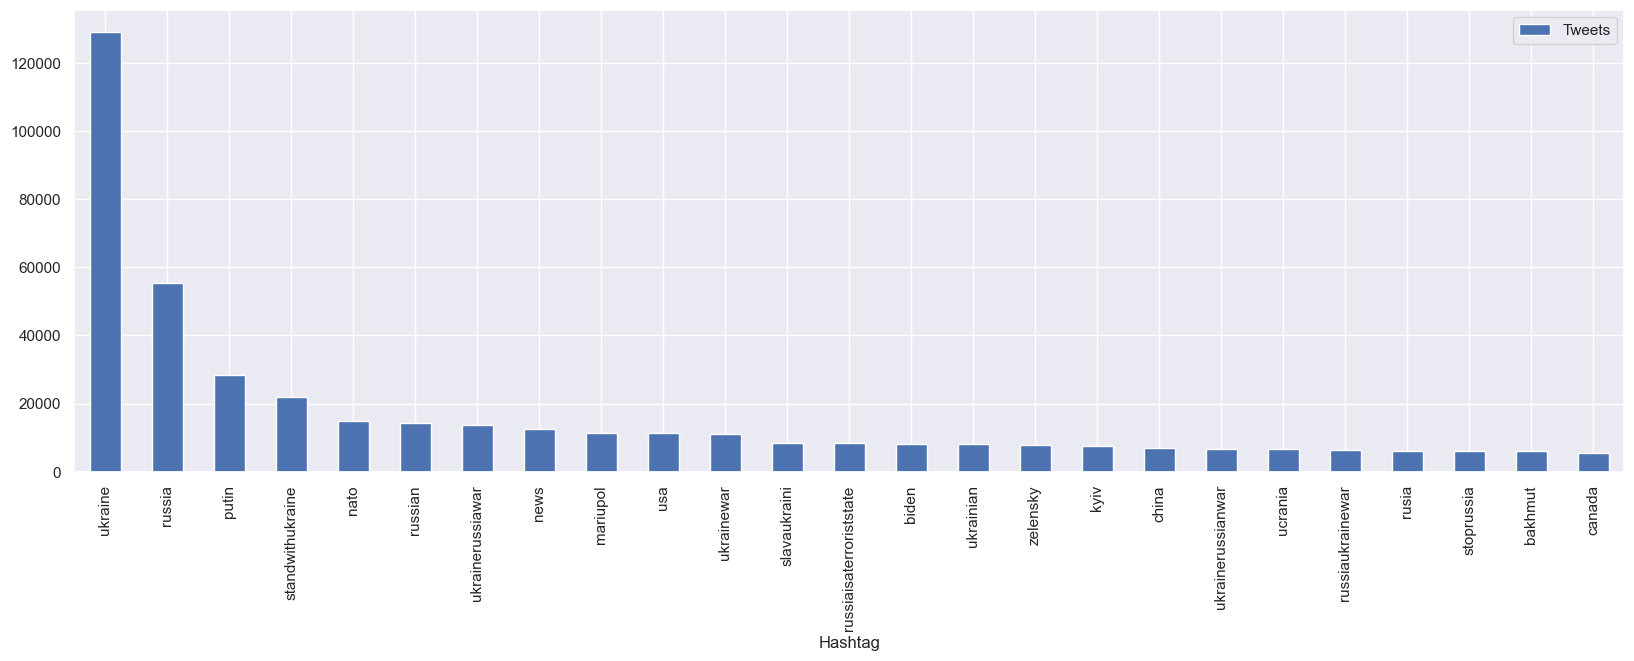

In [51]:
plt.rcParams["figure.figsize"] = [20, 6]
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)

In [52]:
# Sentiment Analysis DS Builder
sentiment_df = df[['tweetid', 'text', 'hashtags', 'language']] # Filtering Columns
sentiment_df = sentiment_df.loc[sentiment_df['language'] == 'en'].reset_index(drop=True)  # Filtering language

In [53]:
sentiment_df['hashtags'] = sentiment_df.hashtags.map(lambda x: [i['text'] for i in eval(x)])  # Keeping only hashtags

In [54]:
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

sentiment_df['text'] = sentiment_df['text'].apply(preprocess)

In [55]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment"
).to(device)

In [56]:
print(torch.__version__)

2.7.1+cu126


In [57]:
labels=[]
task = 'sentiment'
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [58]:
labels

['negative', 'neutral', 'positive']

In [59]:
BATCH_SIZE = 10

scores_all = np.empty((0,len(labels)))
text_all = sentiment_df['text'].to_list()
n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, truncation=True).to(device)
        output = model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()
    

sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [60]:
sentiment_df.to_csv("./Tweets_Sentiment_Analysis_RoBERTa_Raw_Values.csv", index=False)

In [61]:
def get_sentiment(tweet):
    sentiment = TextBlob(tweet).sentiment
    return sentiment.polarity, sentiment.subjectivity

sentiment_df['sentiment'] = sentiment_df['text'].apply(get_sentiment)

In [62]:
sentiment_df['polarity'] = sentiment_df['sentiment'].apply(lambda x:x[0])
sentiment_df['subjectivity'] = sentiment_df['sentiment'].apply(lambda x:x[0])

In [63]:
sentiment_df.drop('sentiment', axis=1, inplace=True)

In [64]:
sentiment_df.to_csv("./Tweets_Sentiment_Analysis_BOW_Raw_Values.csv", index=False)

In [65]:
emotion_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

emotion_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion").to(device)

In [66]:
task='emotion'
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [67]:
BATCH_SIZE = 1024  # Try 512 or 1024 if fits in memory
scores_all = []

text_all = sentiment_df['text'].to_list()
n = len(text_all)

emotion_model = emotion_model.to(device)
tokenizer.model_max_length = 256  # optional to reduce tokenizer truncation time

with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx + BATCH_SIZE, n)
        batch_text = text_all[start_idx:end_idx]

        # Faster tokenization
        encoded_input = tokenizer(
            batch_text,
            return_tensors='pt',
            padding=True,
            truncation=True,
            max_length=256
        ).to(device)

        output = emotion_model(**encoded_input)
        logits = output.logits if hasattr(output, 'logits') else output[0]
        scores = softmax(logits.detach().cpu().numpy(), axis=1)

        scores_all.append(scores)

# Merge once
scores_all = np.vstack(scores_all)
sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)


In [68]:
sentiment_df.to_csv("./Tweets_Emotion_Analysis_RoBERTa_Emotion_Raw_Values.csv", index=False)

In [69]:
# Sentiment and Emotion Analysis
# Reading the Sentiment CSV data from RoBERTa
tweet_df = pd.read_csv("./Tweets_Sentiment_Analysis_RoBERTa_Raw_Values.csv", lineterminator='\n')

In [70]:
tweet_df.insert(7, "Sentiment", '')

In [71]:
tweet_df.columns = tweet_df.columns.str.strip()
print(tweet_df.columns.tolist())

['tweetid', 'text', 'hashtags', 'language', 'negative', 'neutral', 'positive', 'Sentiment']


In [72]:
# Create a new column 'Sentiment' before dropping anything
tweet_df['Sentiment'] = 'neutral'  # default

for i in range(len(tweet_df)):
    if tweet_df['negative'][i] > tweet_df['positive'][i] and tweet_df['negative'][i] > tweet_df['neutral'][i]:
        tweet_df.at[i, 'Sentiment'] = 'negative'
    elif tweet_df['positive'][i] > tweet_df['negative'][i] and tweet_df['positive'][i] > tweet_df['neutral'][i]:
        tweet_df.at[i, 'Sentiment'] = 'positive'

# Now safe to drop the columns
tweet_df.drop(['negative','positive','neutral'], axis=1, inplace=True)
tweet_df.drop('language', axis=1, inplace=True)

# Save to CSV
tweet_df.to_csv("./Tweets_Sentiment_Analysis_RoBERTa.csv", index=False)


C:\Users\VIMS_Lab\AppData\Local\Temp\ipykernel_16912\1552144160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=tweet_df, palette='magma')


<Axes: xlabel='Sentiment', ylabel='count'>

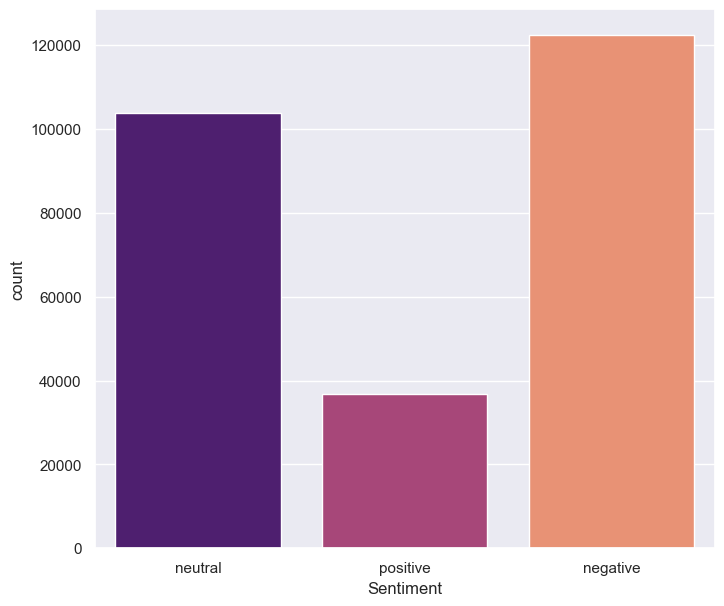

In [73]:
# Plot for Sentiments
plt.figure(figsize = (8,7))
sns.countplot(x="Sentiment", data=tweet_df, palette='magma')

In [74]:
# WordClouds for Negative, Neutral and Positive Sentiments
tweet_neg = tweet_df.loc[tweet_df['Sentiment'] == 'negative'].reset_index(drop=True)
tweet_net = tweet_df.loc[tweet_df['Sentiment'] == 'neutral'].reset_index(drop=True)
tweet_pos = tweet_df.loc[tweet_df['Sentiment'] == 'positive'].reset_index(drop=True)

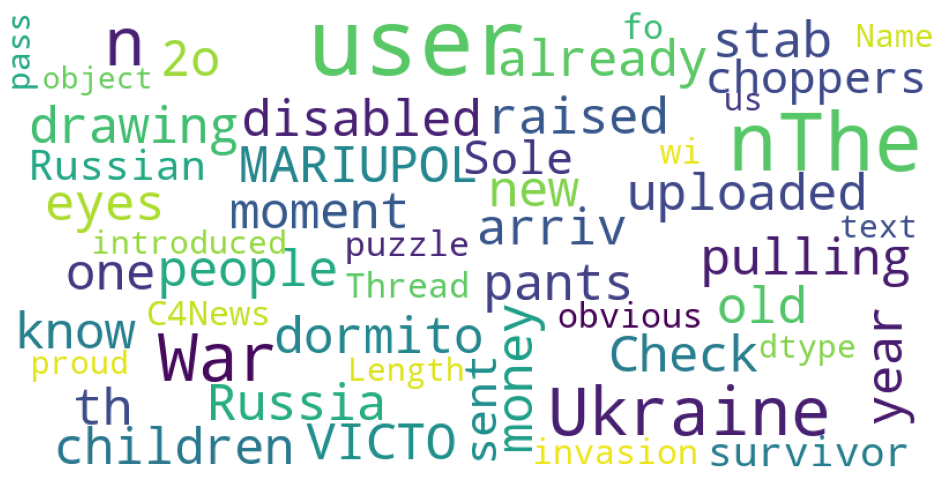

In [75]:
# Negative Sentiment
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_neg['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

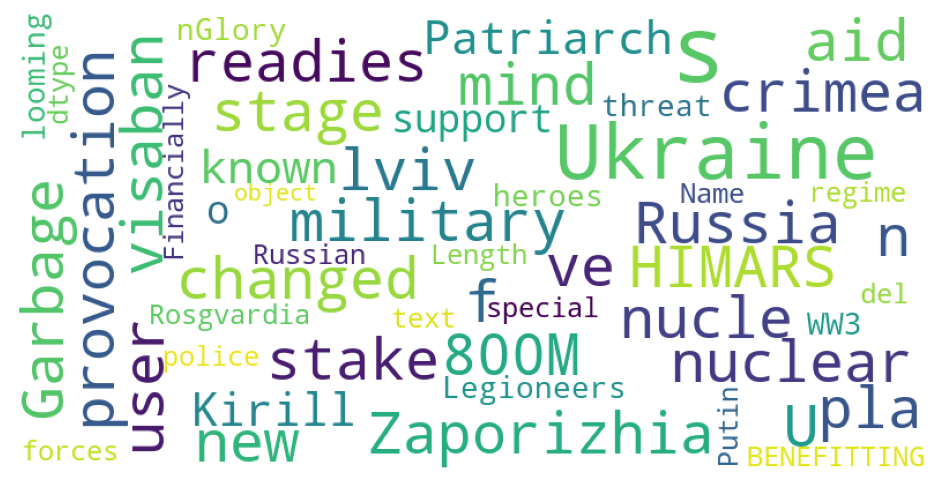

In [76]:
# Neutral Sentiment
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_net['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

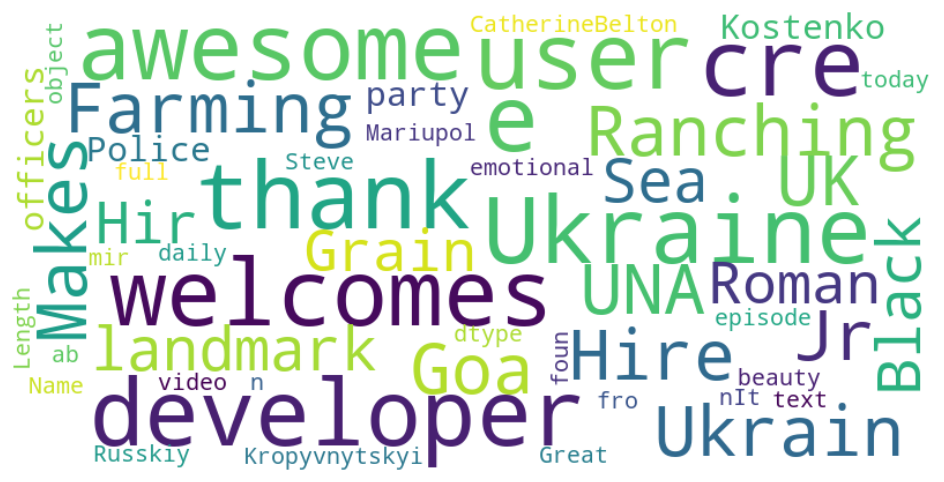

In [77]:
# Positive Sentiment
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(tweet_pos['text']))

print(wordcloud)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
# Pre-Processing the Sentiment Dataframe
dataset = tweet_df[['Sentiment','text']]
text, sentiment = list(dataset['text']), list(dataset['Sentiment'])

In [79]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [80]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\VIMS_Lab\AppData\Local\Temp\ipykernel_16912\2426161746.py:9: SyntaxWarning: invalid escape sequence '\s'
  userPattern       = '@[^\s]+'


In [81]:
nltk.download('wordnet')
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIMS_Lab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Preprocessing complete.
Time Taken: 28 seconds


In [82]:
# Spltting the Dataframe
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)

print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))


Vectoriser fitted.
No. of feature_words:  500000


In [84]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [85]:
# Evaluation
# Bernoulli
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
ys_predict = BNBmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.85      0.83      0.84      6076
     neutral       0.70      0.84      0.77      5261
    positive       0.89      0.47      0.61      1814

    accuracy                           0.78     13151
   macro avg       0.82      0.71      0.74     13151
weighted avg       0.80      0.78      0.78     13151

Confusion Matrix: 
 [[5014 1047   15]
 [ 736 4438   87]
 [ 116  853  845]]
Accuracy Score: 
 0.7829822827161432


In [86]:
# K Nearest Neighbors
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train, y_train)
ys_predict = KNNModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.75      0.83      0.79      6076
     neutral       0.71      0.70      0.70      5261
    positive       0.82      0.53      0.64      1814

    accuracy                           0.74     13151
   macro avg       0.76      0.69      0.71     13151
weighted avg       0.74      0.74      0.73     13151

Confusion Matrix: 
 [[5049  954   73]
 [1417 3705  139]
 [ 261  595  958]]
Accuracy Score: 
 0.7384989734620941


In [87]:
# Decision Tree Classifier
DTCModel = DecisionTreeClassifier(max_depth=20,              # Limit tree depth (tune between 10–30)
    min_samples_split=10,      # Minimum samples to split a node
    random_state=0)
DTCModel.fit(X_train, y_train)
ys_predict = DTCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.68      0.71      0.69      6076
     neutral       0.58      0.67      0.62      5261
    positive       0.75      0.35      0.48      1814

    accuracy                           0.64     13151
   macro avg       0.67      0.57      0.60     13151
weighted avg       0.65      0.64      0.63     13151

Confusion Matrix: 
 [[4286 1707   83]
 [1636 3501  124]
 [ 383  799  632]]
Accuracy Score: 
 0.6401794540339137


In [89]:
# Random Forest Classifier
RFCModel = RandomForestClassifier(n_estimators=10)
RFCModel.fit(X_train, y_train)
ys_predict = RFCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.79      0.88      0.83      6076
     neutral       0.77      0.76      0.77      5261
    positive       0.92      0.57      0.70      1814

    accuracy                           0.79     13151
   macro avg       0.83      0.74      0.77     13151
weighted avg       0.80      0.79      0.79     13151

Confusion Matrix: 
 [[5354  695   27]
 [1177 4023   61]
 [ 245  534 1035]]
Accuracy Score: 
 0.7917268648771957


In [90]:
# Logisitic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
ys_predict = LRmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.89      0.91      0.90      6076
     neutral       0.84      0.85      0.84      5261
    positive       0.87      0.78      0.82      1814

    accuracy                           0.87     13151
   macro avg       0.87      0.84      0.85     13151
weighted avg       0.87      0.87      0.87     13151

Confusion Matrix: 
 [[5525  511   40]
 [ 641 4454  166]
 [  47  355 1412]]
Accuracy Score: 
 0.866169873013459


In [91]:
# Support Vector Classification
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
ys_predict = SVCmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.89      0.91      0.90      6076
     neutral       0.85      0.84      0.84      5261
    positive       0.85      0.80      0.83      1814

    accuracy                           0.87     13151
   macro avg       0.86      0.85      0.86     13151
weighted avg       0.87      0.87      0.87     13151

Confusion Matrix: 
 [[5541  493   42]
 [ 638 4407  216]
 [  40  314 1460]]
Accuracy Score: 
 0.8674625503763972


In [92]:
# Emotion Analysis
# Reading the Emotion CSV data from RoBERTa
emotion_df = pd.read_csv("./Tweets_Emotion_Analysis_RoBERTa_Emotion_Raw_Values.csv", lineterminator='\n')

In [93]:
# Making a new CSV with emotion rather than score of the sentiments
emotion_df.drop(['negative','positive','neutral','polarity','subjectivity','language'], axis=1, inplace=True)

In [ ]:
emotion_df.insert(7, "Emotion", '')

In [102]:
print(emotion_df.columns)

Index(['tweetid', 'text', 'hashtags', 'anger', 'joy', 'optimism', 'sadness\r',
       'Emotion'],
      dtype='object')


In [103]:
# Step 1: Clean column names (to remove '\r' etc.)
emotion_df.columns = emotion_df.columns.str.strip()

# Step 2: List the emotion score columns
emotion_labels = ['anger', 'joy', 'optimism', 'sadness']

# Step 3: Assign the dominant emotion per row
emotion_df['Emotion'] = emotion_df[emotion_labels].idxmax(axis=1)


In [104]:
emotion_df.drop(['anger','joy','optimism','sadness'], axis=1, inplace=True)

In [105]:
emotion_df.to_csv("./Tweets_Emotion_Analysis_RoBERTa.csv", index=False)

C:\Users\VIMS_Lab\AppData\Local\Temp\ipykernel_16912\2298673128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=emotion_df, palette='magma')


<Axes: xlabel='Emotion', ylabel='count'>

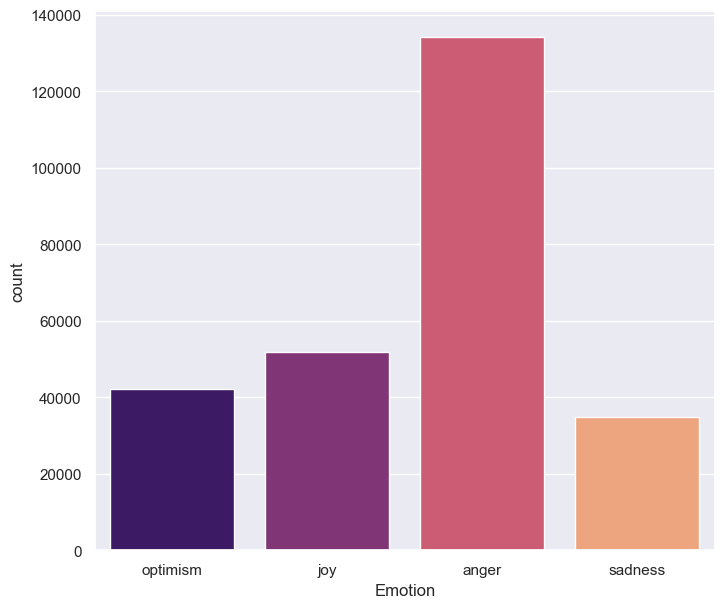

In [106]:
# Plot for Emotions
plt.figure(figsize = (8,7))
sns.countplot(x="Emotion", data=emotion_df, palette='magma')

In [107]:
# WordClouds for Anger, Joy, Optimism and Sadness Emotions
emotion_anger = emotion_df.loc[emotion_df['Emotion'] == 'anger'].reset_index(drop=True)
emotion_joy = emotion_df.loc[emotion_df['Emotion'] == 'joy'].reset_index(drop=True)
emotion_opt = emotion_df.loc[emotion_df['Emotion'] == 'optimism'].reset_index(drop=True)
emotion_sad = emotion_df.loc[emotion_df['Emotion'] == 'sadness'].reset_index(drop=True)

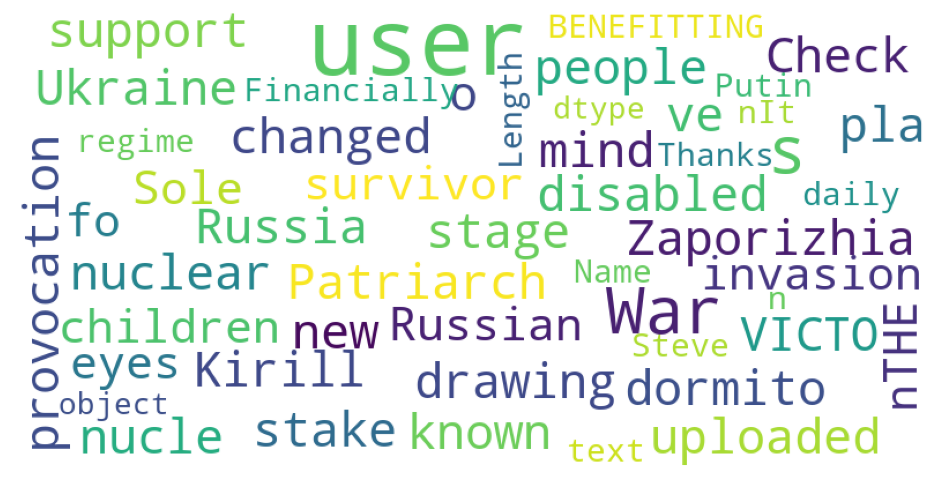

In [108]:
# Emotion - Anger
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_anger['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

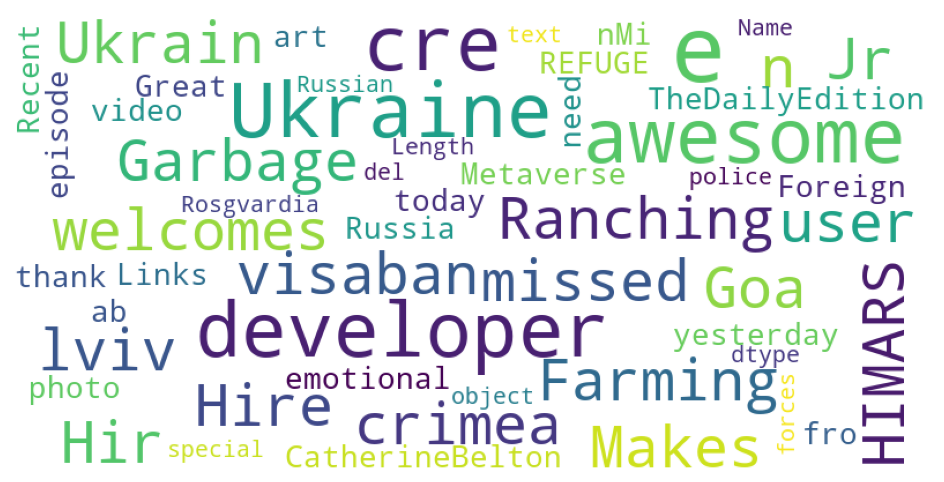

In [109]:
# Emotion - Joy
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_joy['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

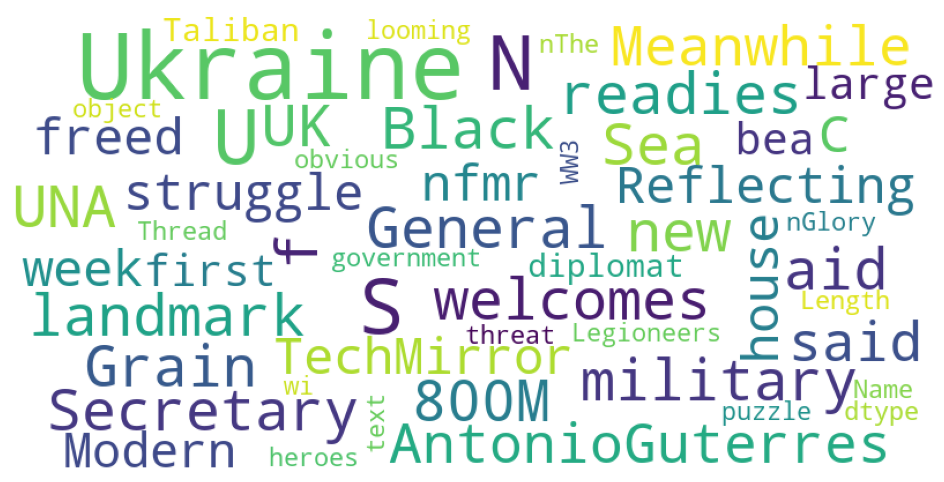

In [110]:
# Emotion - Optimism
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_opt['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

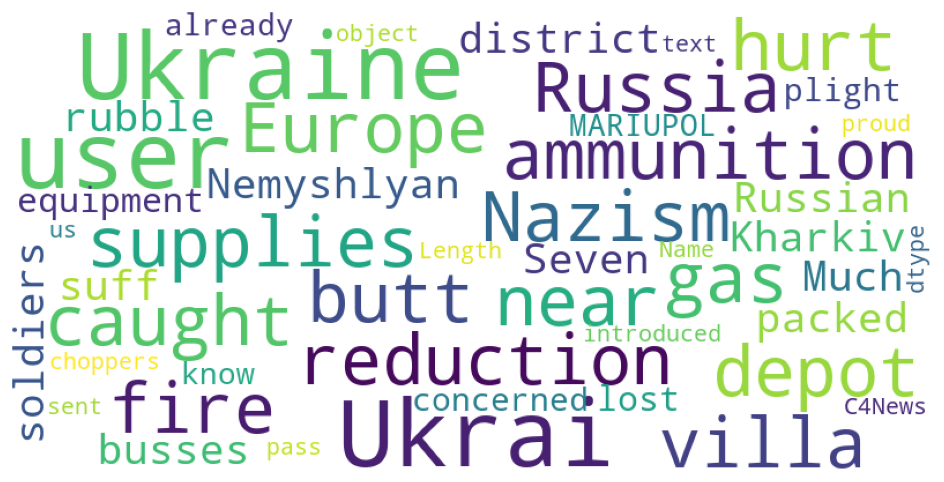

In [111]:
# Emotion - Sadness
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(emotion_sad['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [112]:
# Pre-Processing the Emotion Dataframe
dataset = emotion_df[['Emotion','text']]
text, emotion = list(dataset['text']), list(dataset['Emotion'])

In [113]:
# Splitting the Dataframe
X_train, X_test, y_train, y_test = train_test_split(processedtext, emotion,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)

# Fit on training data
vectoriser.fit(X_train)

# Output status and feature count
print('Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))


Vectoriser fitted.
No. of feature_words:  500000


In [116]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [117]:
# Evaluation
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
ys_predict = BNBmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.75      0.96      0.84      6646
         joy       0.77      0.73      0.75      2579
    optimism       0.79      0.51      0.62      2149
     sadness       0.88      0.39      0.54      1777

    accuracy                           0.76     13151
   macro avg       0.80      0.65      0.69     13151
weighted avg       0.78      0.76      0.75     13151

Confusion Matrix: 
 [[6388  109   94   55]
 [ 588 1876   95   20]
 [ 748  288 1096   17]
 [ 839  152   95  691]]
Accuracy Score: 
 0.764276480875979


In [118]:
# K Nearest Neighbor
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train, y_train)
ys_predict = KNNModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.89      0.62      0.73      6646
         joy       0.51      0.80      0.62      2579
    optimism       0.83      0.45      0.58      2149
     sadness       0.39      0.72      0.51      1777

    accuracy                           0.64     13151
   macro avg       0.65      0.65      0.61     13151
weighted avg       0.74      0.64      0.66     13151

Confusion Matrix: 
 [[4138 1159  100 1249]
 [ 139 2074   64  302]
 [ 179  572  964  434]
 [ 193  277   35 1272]]
Accuracy Score: 
 0.6423846095353966


In [119]:
# Decision Tree Classifier
DTCModel = DecisionTreeClassifier(max_depth=20,              # Limit tree depth (tune between 10–30)
    min_samples_split=10,      # Minimum samples to split a node
    random_state=0)
DTCModel.fit(X_train, y_train)
ys_predict = DTCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.65      0.88      0.75      6646
         joy       0.50      0.44      0.47      2579
    optimism       0.58      0.36      0.45      2149
     sadness       0.76      0.24      0.36      1777

    accuracy                           0.62     13151
   macro avg       0.62      0.48      0.51     13151
weighted avg       0.62      0.62      0.59     13151

Confusion Matrix: 
 [[5851  488  220   87]
 [1194 1134  235   16]
 [ 979  363  776   31]
 [ 986  270  102  419]]
Accuracy Score: 
 0.6220059311079006


In [120]:
# Random Forest Classifier
RFCModel = RandomForestClassifier(n_estimators=5)
RFCModel.fit(X_train, y_train)
ys_predict = RFCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.73      0.94      0.83      6646
         joy       0.72      0.65      0.68      2579
    optimism       0.81      0.50      0.62      2149
     sadness       0.86      0.47      0.61      1777

    accuracy                           0.75     13151
   macro avg       0.78      0.64      0.68     13151
weighted avg       0.76      0.75      0.73     13151

Confusion Matrix: 
 [[6271  230   77   68]
 [ 769 1675  101   34]
 [ 803  247 1069   30]
 [ 699  173   72  833]]
Accuracy Score: 
 0.7488403923655996


In [121]:
# Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
ys_predict = LRmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.87      0.95      0.90      6646
         joy       0.83      0.83      0.83      2579
    optimism       0.83      0.73      0.77      2149
     sadness       0.84      0.67      0.74      1777

    accuracy                           0.85     13151
   macro avg       0.84      0.79      0.81     13151
weighted avg       0.85      0.85      0.85     13151

Confusion Matrix: 
 [[6288  134  120  104]
 [ 267 2149  112   51]
 [ 319  191 1565   74]
 [ 381  113   96 1187]]
Accuracy Score: 
 0.8508098243479584


In [122]:
# Support Vector Machine
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
ys_predict = SVCmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.88      0.94      0.91      6646
         joy       0.83      0.83      0.83      2579
    optimism       0.82      0.75      0.78      2149
     sadness       0.84      0.71      0.76      1777

    accuracy                           0.86     13151
   macro avg       0.84      0.81      0.82     13151
weighted avg       0.85      0.86      0.85     13151

Confusion Matrix: 
 [[6259  130  131  126]
 [ 241 2150  129   59]
 [ 277  205 1605   62]
 [ 326  105   93 1253]]
Accuracy Score: 
 0.8567409322484982


#End